**About Walmart**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


**Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
To: /content/walmart_data.csv?1641285094
100% 23.0M/23.0M [00:00<00:00, 217MB/s]


In [ ]:
df_walmart = pd.read_csv('walmart_data.csv?1641285094')
df_walmart.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df_walmart.shape

(550068, 10)

In [ ]:
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
#changing the column to category
for i in df_walmart.columns[:-1]:
  df_walmart[i] = df_walmart[i].astype('category')

df_walmart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [ ]:
#Satistical summary of object type columns
df_walmart.describe(include = 'category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


In [ ]:
#Satistical summary of numerical data type columns
df_walmart.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [ ]:
#Duplicate Detection
df_walmart.duplicated().value_counts()

False    550068
Name: count, dtype: int64

In [ ]:
# checking the unique values for columns
for i in df_walmart.columns:
    print(i,": ",df_walmart[i].unique())

User_ID :  [1000001, 1000002, 1000003, 1000004, 1000005, ..., 1004588, 1004871, 1004113, 1005391, 1001529]
Length: 5891
Categories (5891, int64): [1000001, 1000002, 1000003, 1000004, ..., 1006037, 1006038, 1006039, 1006040]
Product_ID :  ['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', ..., 'P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853']
Length: 3631
Categories (3631, object): ['P00000142', 'P00000242', 'P00000342', 'P00000442', ..., 'P0099642',
                            'P0099742', 'P0099842', 'P0099942']
Gender :  ['F', 'M']
Categories (2, object): ['F', 'M']
Age :  ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
Occupation :  [10, 16, 15, 7, 20, ..., 18, 5, 14, 13, 6]
Length: 21
Categories (21, int64): [0, 1, 2, 3, ..., 17, 18, 19, 20]
City_Category :  ['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']
Stay_In_Current_City_Years :  ['2', '4+', '3

In [ ]:
#replacing the values in marital_status column

df_walmart['Marital_Status'] = df_walmart['Marital_Status'].replace({0:'Unmarried',1:'Married'})
df_walmart['Marital_Status'].unique()

['Unmarried', 'Married']
Categories (2, object): ['Unmarried', 'Married']

In [ ]:
#Missing Value Analysis
df_walmart.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

**Univariate Analysis**

**Numerical Data**

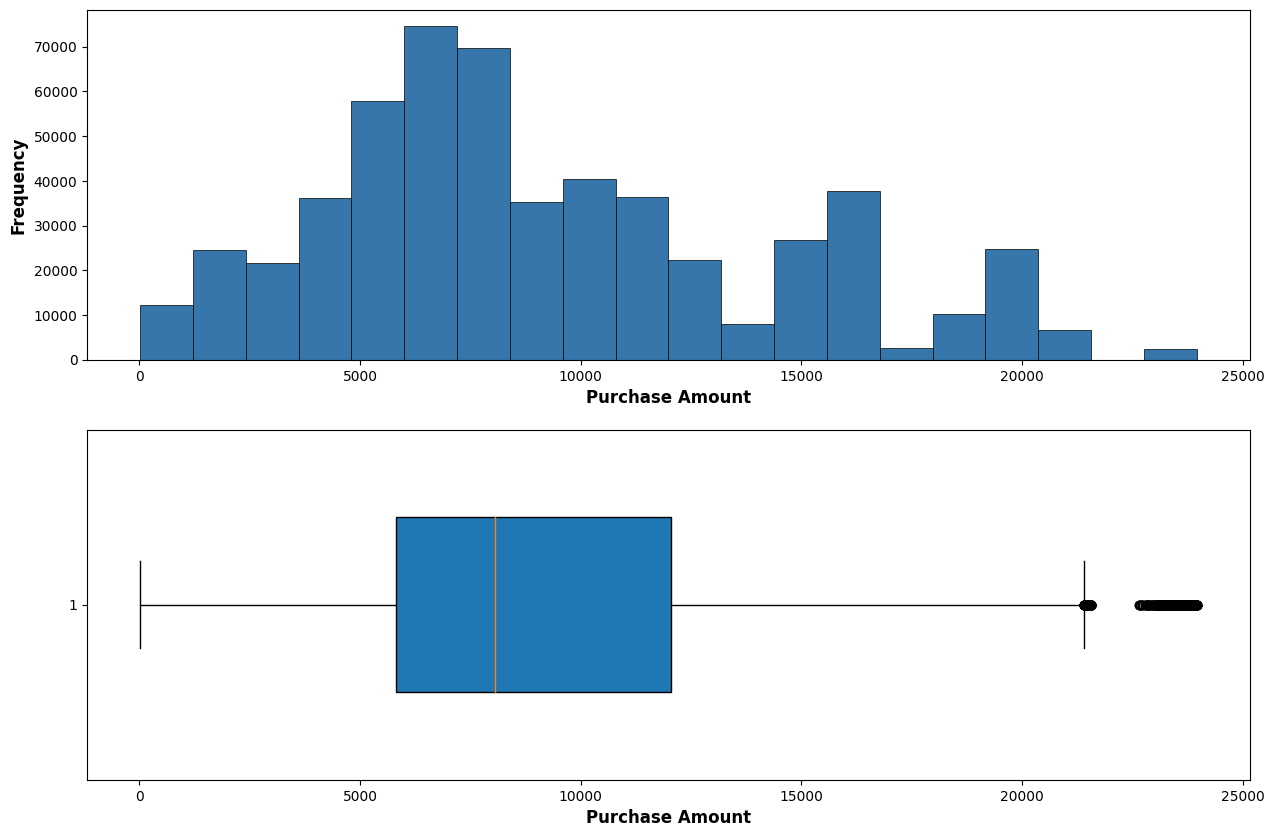

In [ ]:
fig,ax = plt.subplots(2,1,figsize = (15,10))

ax[0].hist(df_walmart['Purchase'],color= '#3776ab',linewidth=0.5,edgecolor='black',bins = 20)
ax[0].set_xlabel('Purchase Amount',fontsize = 12,fontweight = 'bold')
ax[0].set_ylabel('Frequency',fontsize = 12,fontweight = 'bold')

ax[1].boxplot(x = df_walmart['Purchase'],vert = False,patch_artist = True,widths = 0.5)
ax[1].set_xlabel('Purchase Amount',fontweight = 'bold',fontsize = 12)

plt.show()

In [ ]:
#function to find box plot values
def upper_whisker(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    upper_whisker = q3 + 1.5 * iqr
    return upper_whisker

In [ ]:
upper_whisker = upper_whisker(df_walmart['Purchase'])
upper_whisker

21400.5

In [ ]:
#Calculating the Number of Outliers
len(df_walmart.loc[df_walmart['Purchase'] > 21400,'Purchase'])

2677

* There are total of 2677 outliers
* Data suggests that the majority of customers spent between 5,823 USD and 12,054 USD, with the median purchase amount being 8,047 USD.
* The lower limit of 12 USD while the upper limit of 21,400 USD reveal significant variability in customer spending

**Categorical Data**

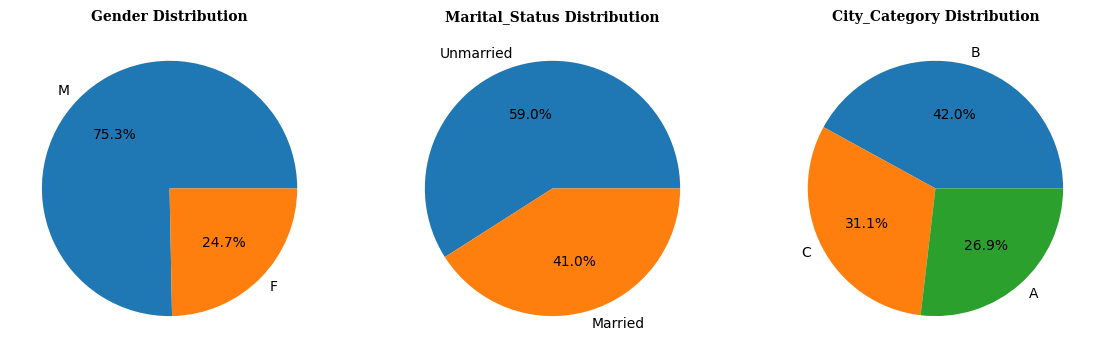

In [ ]:
#Gender, Marital Status and City Category Distribution

fig,ax = plt.subplots(1,3,figsize = (14,5))

ax[0].pie(df_walmart['Gender'].value_counts().values,labels = df_walmart['Gender'].value_counts().index,autopct = '%.1f%%')
ax[0].set_title('Gender Distribution',{'font':'serif', 'size':10,'weight':'bold'})

ax[1].pie(df_walmart['Marital_Status'].value_counts().values,labels = df_walmart['Marital_Status'].value_counts().index,autopct = '%.1f%%')
ax[1].set_title('Marital_Status Distribution',{'font':'serif', 'size':10,'weight':'bold'})

ax[2].pie(df_walmart['City_Category'].value_counts().values,labels = df_walmart['City_Category'].value_counts().index,autopct = '%.1f%%')
ax[2].set_title('City_Category Distribution',{'font':'serif', 'size':10,'weight':'bold'})

plt.show()

1. Gender Distribution - Data indicates a significant disparity in purchase behavior between males and females during the Black Friday event.

2. Marital Status - Given that unmarried customers account for a higher percentage of transactions, it may be worthwhile to consider specific marketing campaigns or promotions that appeal to this group.

3. City Category - City B saw the most number of transactions followed by City C and City A respectively

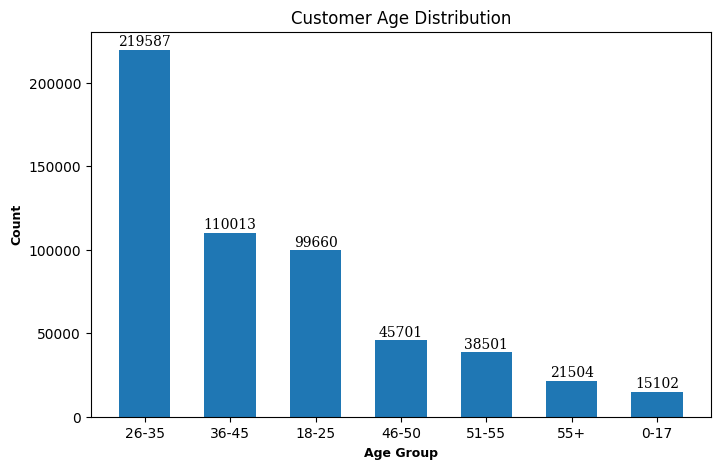

In [ ]:
#Customer Age Distribution

plt.figure(figsize=(8,5))
temp = df_walmart['Age'].value_counts()
plt.bar(x=temp.index,height = temp.values,zorder = 2,width = 0.6)
plt.ylabel('Count',fontweight = 'bold',fontsize = 9)
plt.xlabel('Age Group',fontweight = 'bold',fontsize = 9)
plt.title('Customer Age Distribution')


for i in temp.index:
    plt.text(i,temp[i]+5000,temp[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')


* The age group of 26-35 represents the largest share of Walmart's Black Friday sales, accounting for 40% of the sales. This suggests that the young and middle-aged adults are the most active and interested in shopping for deals and discounts.

* The 36-45 and 18-25 age groups are the second and third largest segments, respectively, with 20% and 18% of the sales. This indicates that Walmart has a diverse customer base that covers different life stages and preferences..

* The 46-50, 51-55, 55+, and 0-17 age groups are the smallest customer segments,This implies that Walmart may need to improve its marketing strategies and product offerings to attract more customers from these age groups, especially the seniors and the children.

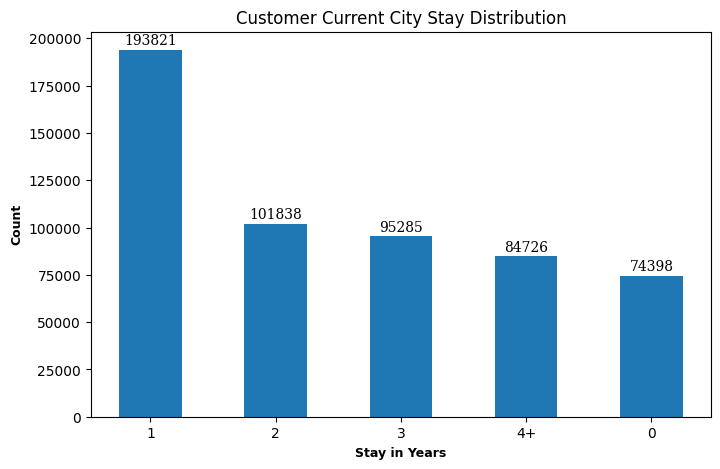

In [ ]:
#Customer Stay In current City Distribution

plt.figure(figsize=(8,5))
temp = df_walmart['Stay_In_Current_City_Years'].value_counts()
plt.bar(x=temp.index,height = temp.values,zorder = 2,width = 0.5)
plt.ylabel('Count',fontweight = 'bold',fontsize = 9)
plt.xlabel('Stay in Years',fontweight = 'bold',fontsize = 9)
plt.title('Customer Current City Stay Distribution')


for i in temp.index:
    plt.text(i,temp[i]+5000,temp[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')

The data suggests that the customers are either new to the city or move frequently, and may have different preferences and needs than long-term residents.

The majority of the customers have stayed in the current city for one year or less. This suggests that Walmart has a strong appeal to newcomers who may be looking for affordable and convenient shopping options.

4+ years category customers indicates that Walmart has a loyal customer base who have been living in the same city for a long time.

The percentage of customers decreases as the stay in the current city increases which suggests that Walmart may benefit from targeting long-term residents for loyalty programs and promotions.

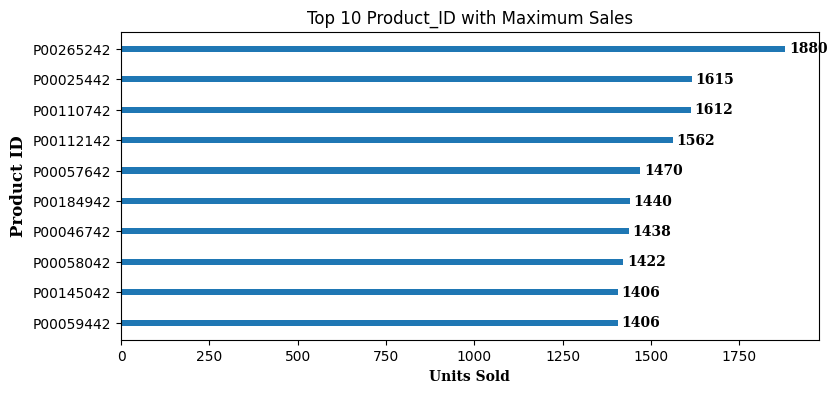

In [ ]:
#Top 10 Products and Categories:

plt.figure(figsize=(9,4))

temp = df_walmart['Product_ID'].value_counts()[0:10]
temp = temp.iloc[-1:-11:-1]
plt.barh(y = temp.index,width = temp.values,height = 0.2)
for y,x in zip(temp.index,temp.values):
    plt.text( x + 10 , y , x,{'font':'serif', 'size':10,'weight':'bold'},va='center')
plt.xlabel('Units Sold',{'font':'serif', 'size':10,'weight':'bold'})
plt.ylabel('Product ID',{'font':'serif', 'size':12,'weight':'bold'})
plt.title('Top 10 Product_ID with Maximum Sales')

plt.show()

Top 10 Products Sold - The top-selling products during Walmart's Black Friday sales are characterized by a relatively small variation in sales numbers, suggesting that Walmart offers a variety of products that many different customers like to buy.

[]

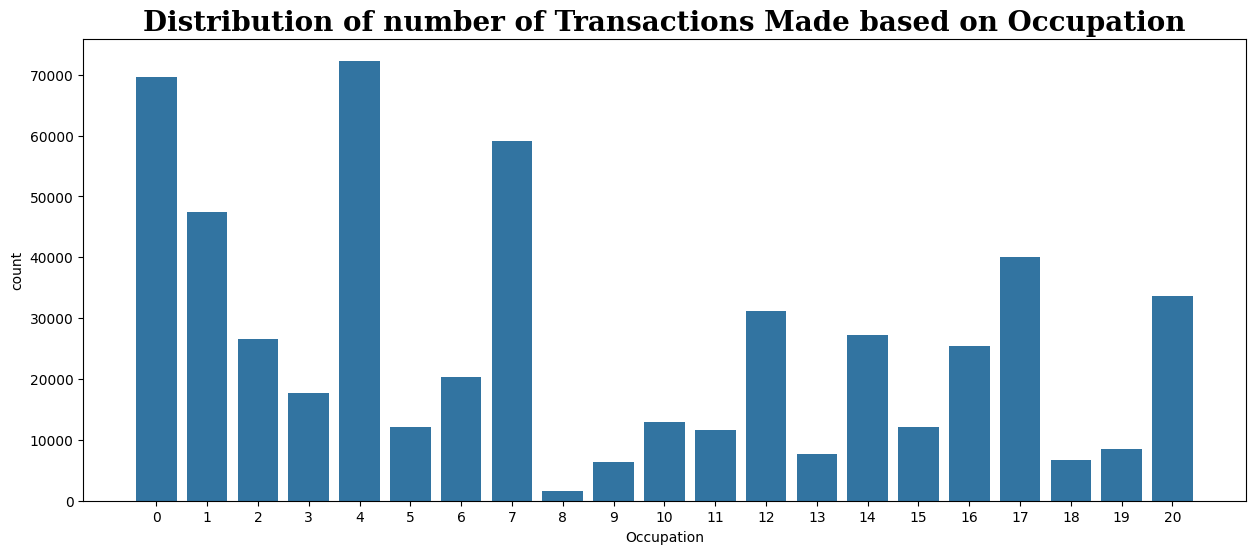

In [ ]:
#Distribution Customer Occupation
plt.figure(figsize = (15, 6))
plt.title('Distribution of number of Transactions Made based on Occupation',
          fontsize = 20,
          fontweight = 600,
          fontfamily = 'serif')
sns.countplot(data = df_walmart, x = 'Occupation')
plt.plot()

Customers with Occupation category 4,0 and 7 contributed significantly  the total purchases suggesting that these occupations have a high demand for Walmart products or services, or that they have more disposable income to spend on Black Friday.

**Bivariate Analysis**

**Exploring Purchase Patterns**

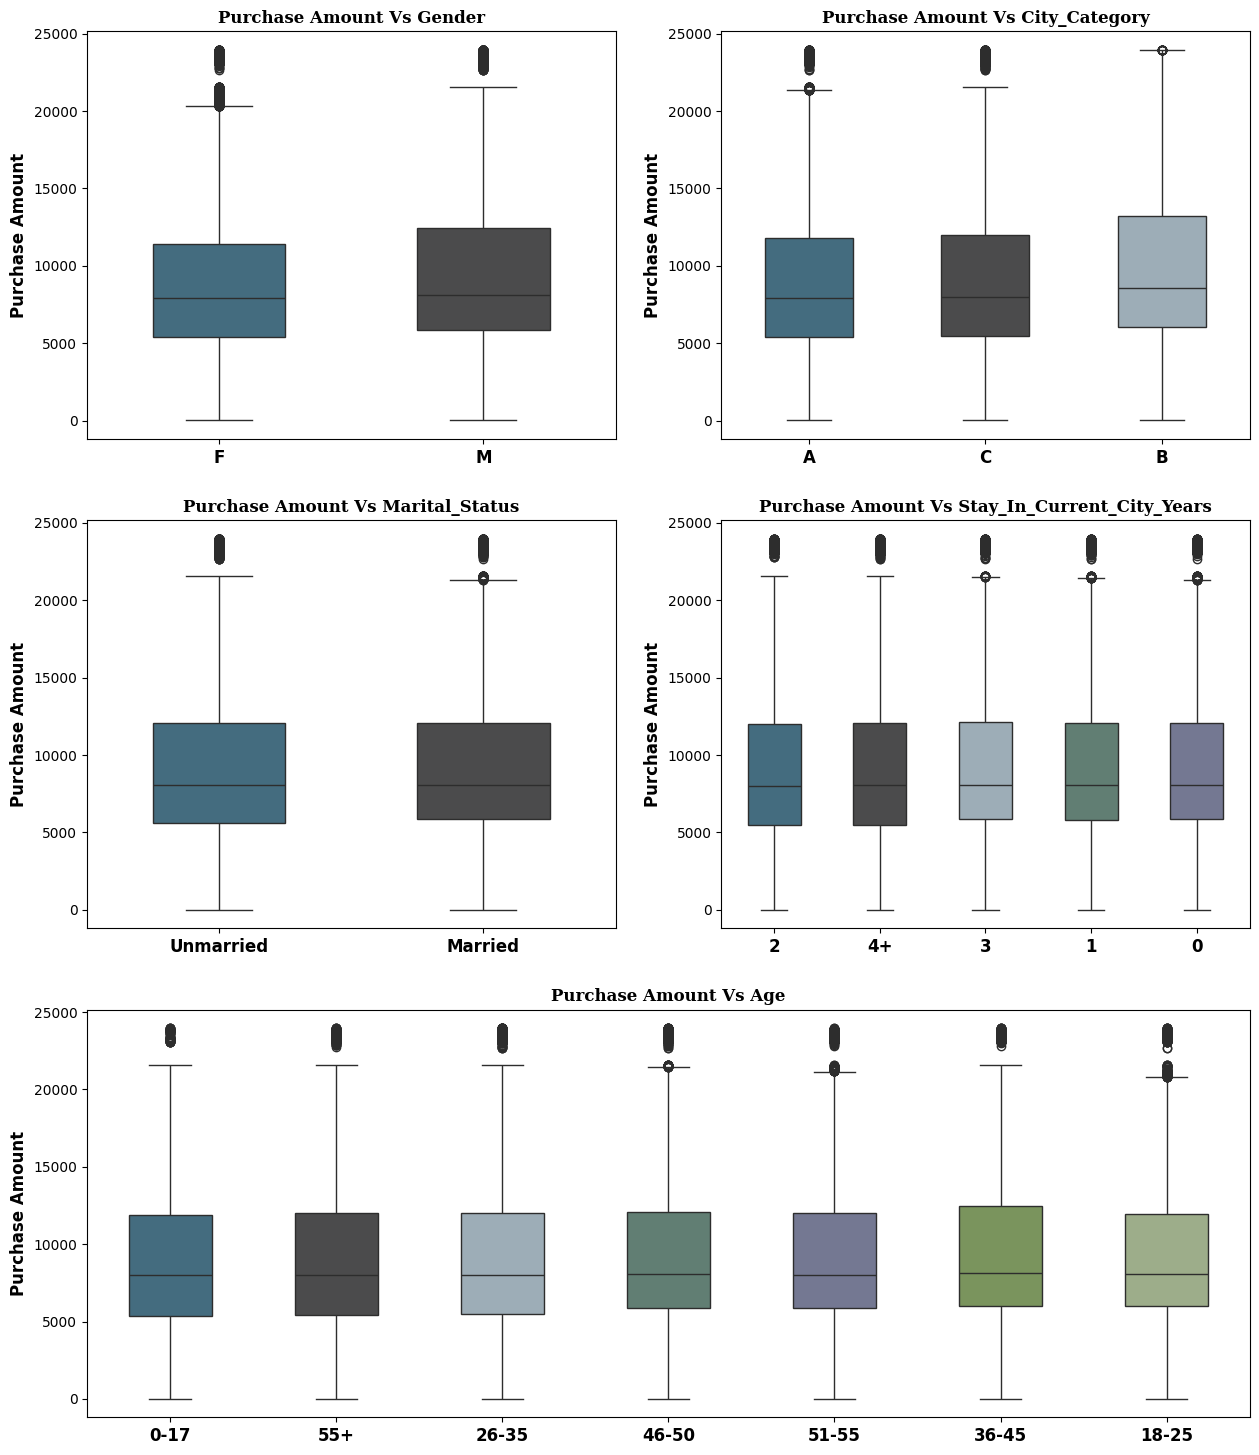

In [ ]:
#Distribution Customer Occupation

#setting the plot style
fig = plt.figure(figsize = (15,18))
gs = fig.add_gridspec(3,2)

for i,j,k in [(0,0,'Gender'),(0,1,'City_Category'),(1,0,'Marital_Status'),(1,1,'Stay_In_Current_City_Years'),(2,1,'Age')]:

    #plot position
    if i <= 1:
        ax0 = fig.add_subplot(gs[i,j])
    else:
        ax0 = fig.add_subplot(gs[i,:])

    #plot
    color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384']
    sns.boxplot(data = df_walmart, x = k, y  = 'Purchase' ,ax = ax0,width = 0.5, palette =color_map)

    #plot title
    ax0.set_title(f'Purchase Amount Vs {k}',{'font':'serif', 'size':12,'weight':'bold'})

    #customizing axis
    ax0.set_xticklabels(df_walmart[k].unique(),fontweight = 'bold',fontsize = 12)
    ax0.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
    ax0.set_xlabel('')


plt.show()

Out of all the variables analysed above, it's noteworthy that the purchase amount remains relatively stable regardless of the variable under consideration. As indicated in the data, the median purchase amount consistently hovers around 8,000 USD, regardless of the specific variable being examined.

**Gender VS Purchase Amount**

In [ ]:
#creating a df for purchase amount vs gender
temp = df_walmart.groupby('Gender')['Purchase'].agg(['sum','count']).reset_index()
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)
temp['per_purchase'] = round(temp['sum']/temp['count'])
temp['Gender'] = temp['Gender'].replace({'F':'Female','M':'Male'})

temp

,Gender,sum,count,sum_in_billions,%sum,per_purchase
0,Female,1186232642,135809,1.19,0.233,8735.0
1,Male,3909580100,414259,3.91,0.767,9438.0


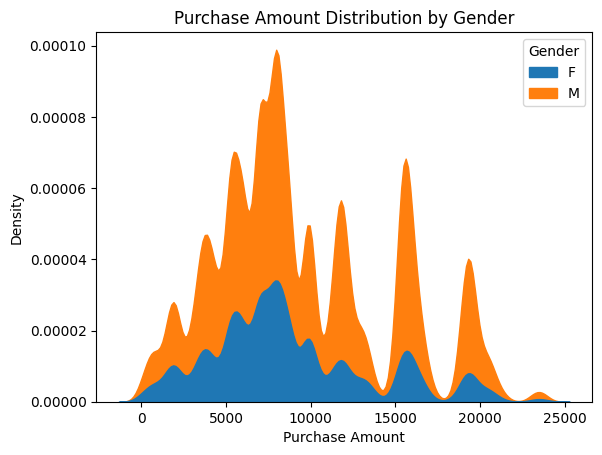

In [ ]:
#plotting the kdeplot
sns.kdeplot(data = df_walmart, x = 'Purchase', hue = 'Gender',fill = True, alpha = 1)
plt.xlabel('Purchase Amount')
plt.title('Purchase Amount Distribution by Gender')
plt.show()

* The total purchase amount and number of transactions by male customers was more than three times the amount and transactions by female customers indicating that they had a more significant impact on the Black Friday sales.
* As seen above, the purchase amount for both the genders is not normally distributed.

**Confidence Interval Construction: Estimating Average Purchase Amount per Transaction**

1. Step 1 - Building CLT Curve

* As seen above, the purchase amount distribution is not Normal. So we need to use Central Limit Theorem. It states the distribution of sample means will approximate a normal distribution, regardless of the underlying population distribution

2. Step 2 - Building Confidence Interval

* After building CLT curve, we will create a confidence interval predicting population mean at 95% Confidence level.

In [ ]:
#creating a function to calculate confidence interval

def confidence_interval(data,ci):
    #converting the list to series
    l_ci = (100-ci)/2
    u_ci = (100+ci)/2

    #calculating lower limit and upper limit of confidence interval
    interval = np.percentile(data,[l_ci,u_ci]).round(0)

    return interval

In [ ]:
def plot(ci):

    #setting the plot style
    fig = plt.figure(figsize = (15,8))
    gs = fig.add_gridspec(2,2)

    #creating separate data frames for each gender
    df_male = df_walmart.loc[df_walmart['Gender'] == 'M','Purchase']
    df_female = df_walmart.loc[df_walmart['Gender'] == 'F','Purchase']

    #sample sizes and corresponding plot positions
    sample_sizes = [(100,0,0),(1000,0,1),(5000,1,0),(50000,1,1)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    male_samples = {}
    female_samples = {}

    for i,x,y in sample_sizes:
        male_means = [] #list for collecting the means of male sample
        female_means = [] #list for collecting the means of female sample

        for j in range(bootstrap_samples):

            #creating random 5000 samples of i sample size
            male_bootstrapped_samples = np.random.choice(df_male,size = i)
            female_bootstrapped_samples = np.random.choice(df_female,size = i)

            #calculating mean of those samples
            male_sample_mean = np.mean(male_bootstrapped_samples)
            female_sample_mean = np.mean(female_bootstrapped_samples)

            #appending the mean to the list
            male_means.append(male_sample_mean)
            female_means.append(female_sample_mean)

        #storing the above sample generated
        male_samples[f'{ci}%_{i}'] = male_means
        female_samples[f'{ci}%_{i}'] = female_means

        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'male_means':male_means,'female_means':female_means})

        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[x,y])

        #plots for male and female
        sns.kdeplot(data = temp_df,x = 'male_means',color ="#3A7089" ,fill = True, alpha = 0.5,ax = ax,label = 'Male')
        sns.kdeplot(data = temp_df,x = 'female_means',color ="#4b4b4c" ,fill = True, alpha = 0.5,ax = ax,label = 'Female')

        #calculating confidence intervals for given confidence level(ci)
        m_range = confidence_interval(male_means,ci)
        f_range = confidence_interval(female_means,ci)

        #plotting confidence interval on the distribution
        for k in m_range:
            ax.axvline(x = k,ymax = 0.9, color ="#3A7089",linestyle = '--')

        for k in f_range:
            ax.axvline(x = k,ymax = 0.9, color ="#4b4b4c",linestyle = '--')

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()

    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()

    return male_samples,female_samples

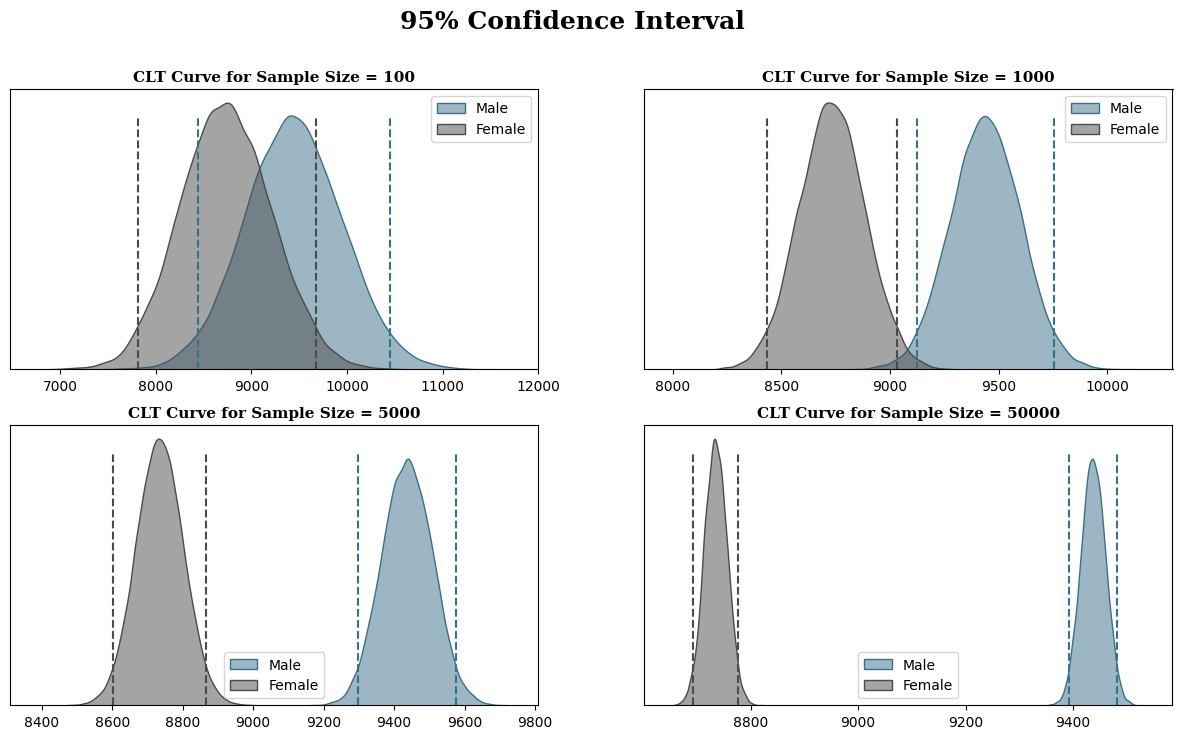

In [ ]:
m_samp_95,f_samp_95 = plot(95)

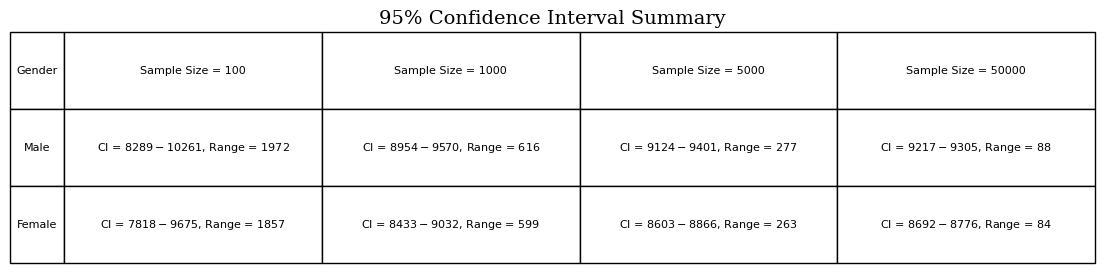

In [ ]:
#Are confidence intervals of average male and female spending overlapping?

#setting the plot style
fig,ax = plt.subplots(figsize = (14,3))

#list for collecting ci for given cl
m_ci = ['Male']
f_ci = ['Female']

#finding ci for each sample size (married)
for m in m_samp_95:
    m_range = confidence_interval(m_samp_95[m],95)
    m_ci.append(f"CI = ${m_range[0]:.0f} - ${m_range[1]:.0f}, Range = {(m_range[1] - m_range[0]):.0f}")

#finding ci for each sample size (unmarried)
for u in f_samp_95:
    u_range = confidence_interval(f_samp_95[u],95)
    f_ci.append(f"CI = ${u_range[0]:.0f} - ${u_range[1]:.0f}, Range = {(u_range[1] - u_range[0]):.0f}")

#plotting the summary
#contents of the table
ci_info = [m_ci,f_ci]


#contents of the table
ci_info = [m_ci,f_ci]

#plotting the table
table = ax.table(cellText = ci_info, cellLoc='center',
                colLabels =['Gender','Sample Size = 100','Sample Size = 1000','Sample Size = 5000','Sample Size = 50000'],
                colLoc = 'center',colWidths = [0.05,0.2375,0.2375,0.2375,0.2375],bbox =[0, 0, 1, 1])

table.set_fontsize(13)

#removing axis
ax.axis('off')

#setting title
ax.set_title(f"{k}% Confidence Interval Summary",{'font':'serif', 'size':14})
plt.show()



* The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence intervals become narrower and more precise. In business, this implies that larger sample sizes can provide more reliable insights and estimates.


* From the above analysis, we can see that except for the Sample Size of 100, the confidence interval do not overlap as the sample size increases. This means that there is a statistically significant difference between the average spending per transaction for men and women within the given samples.


* We are 95% confident that the true population average for males falls between 9,393 and 9,483, and for females, it falls between 8,692 and 8,777.


* Men tend to spend more money per transaction on average than women, as the upper bounds of the confidence intervals for men are consistently higher than those for women across different sample sizes.

**Marital Status VS Purchase Amount**

In [ ]:
#creating a df for purchase amount vs marital status
temp = df_walmart.groupby('Marital_Status')['Purchase'].agg(['sum','count']).reset_index()
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)
temp['per_purchase'] = round(temp['sum']/temp['count'])
temp['Marital_Status'] = temp['Marital_Status']

temp

,Marital_Status,sum,count,sum_in_billions,%sum,per_purchase
0,Unmarried,3008927447,324731,3.01,0.59,9266.0
1,Married,2086885295,225337,2.09,0.41,9261.0


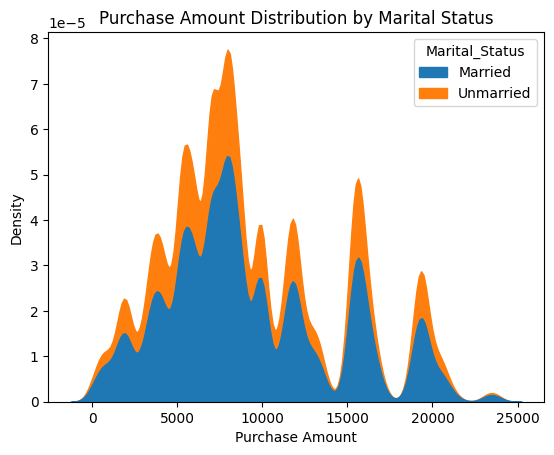

In [ ]:
#plotting the kdeplot
sns.kdeplot(data = df_walmart, x = 'Purchase', hue = 'Marital_Status',fill = True, alpha = 1,hue_order = ['Married','Unmarried'])
plt.xlabel('Purchase Amount')
plt.title('Purchase Amount Distribution by Marital Status')
plt.show()


* The total purchase amount and number of transactions by Unmarried customers was more than 20% the amount and transactions by married customers indicating that they had a more significant impact on the Black Friday sales.

* As seen above, the purchase amount for both married and unmarried customers is not normally distributed.

**Confidence Interval Construction: Estimating Average Purchase Amount per Transaction**

1. Step 1 - Building CLT Curve

* As seen above, the purchase amount distribution is not Normal. So we need to use Central Limit Theorem. It states the distribution of sample means will approximate a normal distribution, regardless of the underlying population distribution

2. Step 2 - Building Confidence Interval

* After building CLT curve, we will create a confidence interval predicting population mean at 95% Confidence level.

In [ ]:
def plot(ci):

    #setting the plot style
    fig = plt.figure(figsize = (15,8))
    gs = fig.add_gridspec(2,2)

    #creating separate data frames
    df_married = df_walmart.loc[df_walmart['Marital_Status'] == 'Married','Purchase']
    df_unmarried = df_walmart.loc[df_walmart['Marital_Status'] == 'Unmarried','Purchase']

    #sample sizes and corresponding plot positions
    sample_sizes = [(100,0,0),(1000,0,1),(5000,1,0),(50000,1,1)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    married_samples = {}
    unmarried_samples = {}

    for i,x,y in sample_sizes:
        married_means = [] #list for collecting the means of married sample
        unmarried_means = [] #list for collecting the means of unmarried sample

        for j in range(bootstrap_samples):

            #creating random 5000 samples of i sample size
            married_bootstrapped_samples = np.random.choice(df_married,size = i)
            unmarried_bootstrapped_samples = np.random.choice(df_unmarried,size = i)

            #calculating mean of those samples
            married_sample_mean = np.mean(married_bootstrapped_samples)
            unmarried_sample_mean = np.mean(unmarried_bootstrapped_samples)

            #appending the mean to the list
            married_means.append(married_sample_mean)
            unmarried_means.append(unmarried_sample_mean)

        #storing the above sample generated
        married_samples[f'{ci}%_{i}'] = married_means
        unmarried_samples[f'{ci}%_{i}'] = unmarried_means

        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'married_means':married_means,'unmarried_means':unmarried_means})

        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[x,y])

        #plots for married and unmarried
        sns.kdeplot(data = temp_df,x = 'married_means',color ="#3A7089" ,fill = True, alpha = 0.5,ax = ax,label = 'Married')
        sns.kdeplot(data = temp_df,x = 'unmarried_means',color ="#4b4b4c" ,fill = True, alpha = 0.5,ax = ax,label = 'Unmarried')

        #calculating confidence intervals for given confidence level(ci)
        m_range = confidence_interval(married_means,ci)
        u_range = confidence_interval(unmarried_means,ci)

        #plotting confidence interval on the distribution
        for k in m_range:
            ax.axvline(x = k,ymax = 0.9, color ="#3A7089",linestyle = '--')

        for k in u_range:
            ax.axvline(x = k,ymax = 0.9, color ="#4b4b4c",linestyle = '--')

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()

    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()

    return married_samples,unmarried_samples

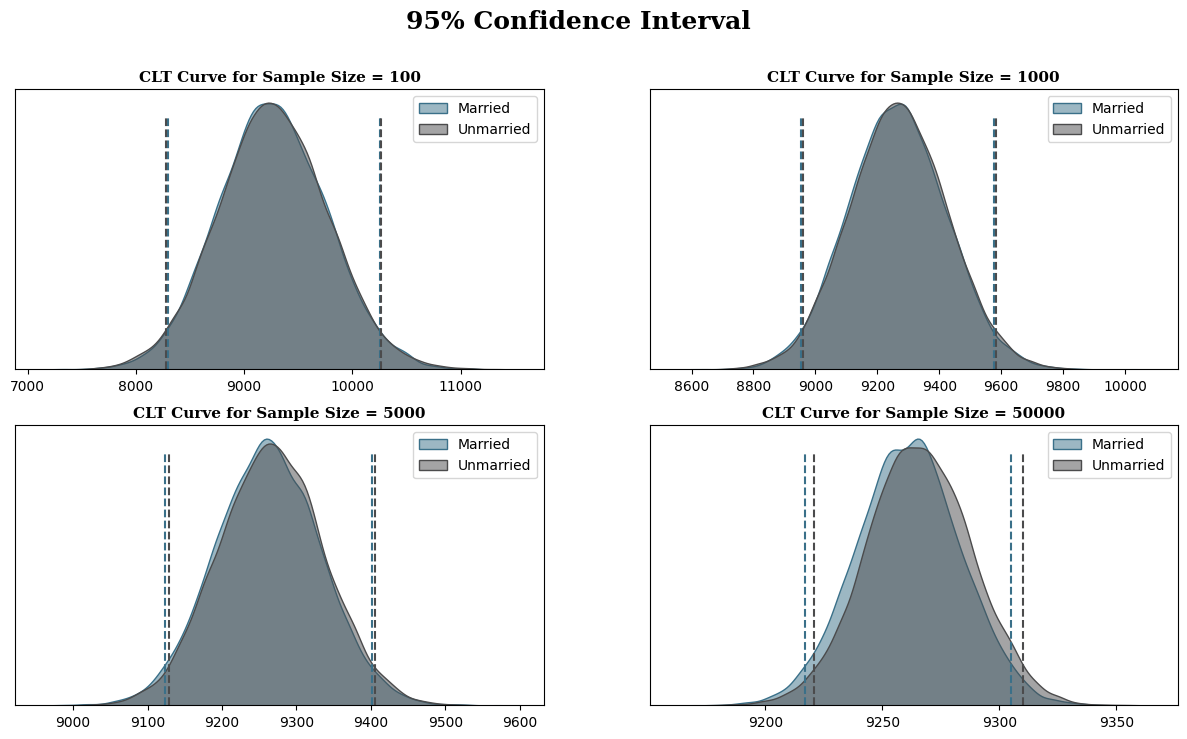

In [ ]:
m_samp_95,u_samp_95 = plot(95)

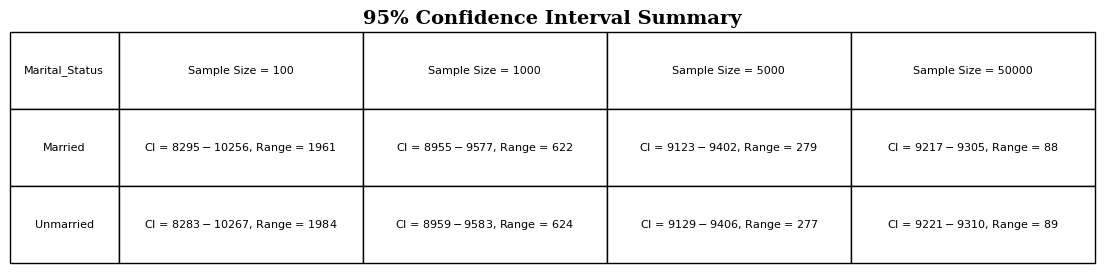

In [ ]:
# Are confidence intervals of average married and unmarried customer spending overlapping?

#setting the plot style
fig,ax = plt.subplots(figsize = (14,3))

#list for collecting ci for given cl
m_ci = ['Married']
u_ci = ['Unmarried']

#finding ci for each sample size (married)
for m in m_samp_95:
    m_range = confidence_interval(m_samp_95[m],95)
    m_ci.append(f"CI = ${m_range[0]:.0f} - ${m_range[1]:.0f}, Range = {(m_range[1] - m_range[0]):.0f}")

#finding ci for each sample size (unmarried)
for u in u_samp_95:
    u_range = confidence_interval(u_samp_95[u],95)
    u_ci.append(f"CI = ${u_range[0]:.0f} - ${u_range[1]:.0f}, Range = {(u_range[1] - u_range[0]):.0f}")

#plotting the summary
#contents of the table
ci_info = [m_ci,u_ci]

#plotting the table
table = ax.table(cellText = ci_info, cellLoc='center',
             colLabels =['Marital_Status','Sample Size = 100','Sample Size = 1000','Sample Size = 5000','Sample Size = 50000'],
             colLoc = 'center',colWidths = [0.1,0.225,0.225,0.225,0.225],bbox =[0, 0, 1, 1])

table.set_fontsize(13)

#removing axis
ax.axis('off')

#setting title
ax.set_title(f"95% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})

plt.show()



* The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence intervals become narrower and more precise. In business, this implies that larger sample sizes can provide more reliable insights and e

* From the above analysis, we can see that the confidence interval overlap for all the sample sizes. This means that there is no statistically significant difference between the average spending per transaction for married and unmarried customers within the given samples.


* We are 95% confident that the true population average for married customers falls between 9,217 and 9,305, and for unmarried customers, it falls between 9,222 and 9,311.


* The overlapping confidence intervals of average spending for married and unmarried customers indicate that both married and unmarried customers spend a similar amount per transaction. This implies a resemblance in spending behavior between the two groups.

**Customer Age VS Purchase Amount**

In [ ]:
#creating a df for purchase amount vs marital status
temp = df_walmart.groupby('Age')['Purchase'].agg(['sum','count']).reset_index()
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)
temp['per_purchase'] = round(temp['sum']/temp['count'])
temp['Age'] = temp['Age']

temp

,Age,sum,count,sum_in_billions,%sum,per_purchase
0,0-17,134913183,15102,0.13,0.026,8933.0
1,18-25,913848675,99660,0.91,0.179,9170.0
2,26-35,2031770578,219587,2.03,0.399,9253.0
3,36-45,1026569884,110013,1.03,0.201,9331.0
4,46-50,420843403,45701,0.42,0.083,9209.0
5,51-55,367099644,38501,0.37,0.072,9535.0
6,55+,200767375,21504,0.20,0.039,9336.0


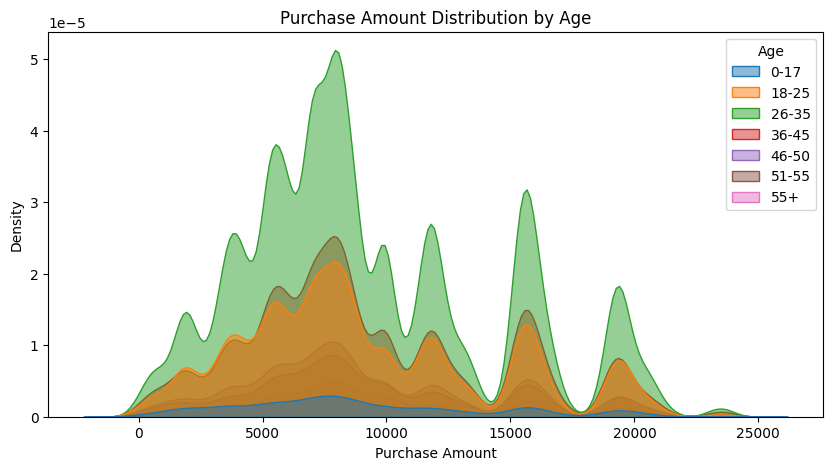

In [ ]:
#plotting the kdeplot
plt.figure(figsize=(10,5))
sns.kdeplot(data = df_walmart, x = 'Purchase', hue = 'Age',fill = True, alpha = 0.5)
plt.xlabel('Purchase Amount')
plt.title('Purchase Amount Distribution by Age')
plt.show()


* Age group between 26 - 45 accounts to almost 60% of the total sales suggesting that Walmart's Black Friday sales are most popular among these age groups.

* As seen above, the purchase amount for all age groups is not normally distributed.

**Confidence Interval Construction: Estimating Average Purchase Amount per Transaction**
1. Step 1 - Building CLT Curve

* As seen above, the purchase amount distribution is not Normal. So we need to use Central Limit Theorem. It states the distribution of sample means will approximate a normal distribution, regardless of the underlying population distribution
2. Step 2 - Building Confidence Interval

* After building CLT curve, we will create a confidence interval predicting population mean at 95% Confidence level.

In [ ]:
def plot(ci):

    #setting the plot style
    fig = plt.figure(figsize = (15,15))
    gs = fig.add_gridspec(4,1)

    #creating separate data frames

    df_1 = df_walmart.loc[df_walmart['Age'] == '0-17','Purchase']
    df_2 = df_walmart.loc[df_walmart['Age'] == '18-25','Purchase']
    df_3 = df_walmart.loc[df_walmart['Age'] == '26-35','Purchase']
    df_4 = df_walmart.loc[df_walmart['Age'] == '36-45','Purchase']
    df_5 = df_walmart.loc[df_walmart['Age'] == '46-50','Purchase']
    df_6 = df_walmart.loc[df_walmart['Age'] == '51-55','Purchase']
    df_7 = df_walmart.loc[df_walmart['Age'] == '55+','Purchase']


    #sample sizes and corresponding plot positions
    sample_sizes = [(100,0),(1000,1),(5000,2),(50000,3)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    samples1,samples2,samples3,samples4,samples5,samples6,samples7 = {},{},{},{},{},{},{}

    for i,x in sample_sizes:
        l1,l2,l3,l4,l5,l6,l7 = [],[],[],[],[],[],[]

        for j in range(bootstrap_samples):

            #creating random 5000 samples of i sample size
            bootstrapped_samples_1 = np.random.choice(df_1,size = i)
            bootstrapped_samples_2 = np.random.choice(df_2,size = i)
            bootstrapped_samples_3 = np.random.choice(df_3,size = i)
            bootstrapped_samples_4 = np.random.choice(df_4,size = i)
            bootstrapped_samples_5 = np.random.choice(df_5,size = i)
            bootstrapped_samples_6 = np.random.choice(df_6,size = i)
            bootstrapped_samples_7 = np.random.choice(df_7,size = i)

            #calculating mean of those samples
            sample_mean_1 = np.mean(bootstrapped_samples_1)
            sample_mean_2 = np.mean(bootstrapped_samples_2)
            sample_mean_3 = np.mean(bootstrapped_samples_3)
            sample_mean_4 = np.mean(bootstrapped_samples_4)
            sample_mean_5 = np.mean(bootstrapped_samples_5)
            sample_mean_6 = np.mean(bootstrapped_samples_6)
            sample_mean_7 = np.mean(bootstrapped_samples_7)

            #appending the mean to the list
            l1.append(sample_mean_1)
            l2.append(sample_mean_2)
            l3.append(sample_mean_3)
            l4.append(sample_mean_4)
            l5.append(sample_mean_5)
            l6.append(sample_mean_6)
            l7.append(sample_mean_7)

        #storing the above sample generated
        samples1[f'{ci}%_{i}'] = l1
        samples2[f'{ci}%_{i}'] = l2
        samples3[f'{ci}%_{i}'] = l3
        samples4[f'{ci}%_{i}'] = l4
        samples5[f'{ci}%_{i}'] = l5
        samples6[f'{ci}%_{i}'] = l6
        samples7[f'{ci}%_{i}'] = l7


        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'0-17':l1,'18-25':l2,'26-35':l3,'36-45':l4,'46-50':l5,'51-55':l6,'55+':l7})

                                                        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[x])

        #plots
        for p,q in [('#3A7089', '0-17'),('#4b4b4c', '18-25'),('#99AEBB', '26-35'),('#5C8374', '36-45'),('#6F7597', '46-50'),
                 ('#7A9D54', '51-55'),('#9EB384', '55+')]:

            sns.kdeplot(data = temp_df,x = q,color =p ,fill = True, alpha = 0.5,ax = ax,label = q)


        #removing the axis lines
        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()

    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()

    return samples1,samples2,samples3,samples4,samples5,samples6,samples7

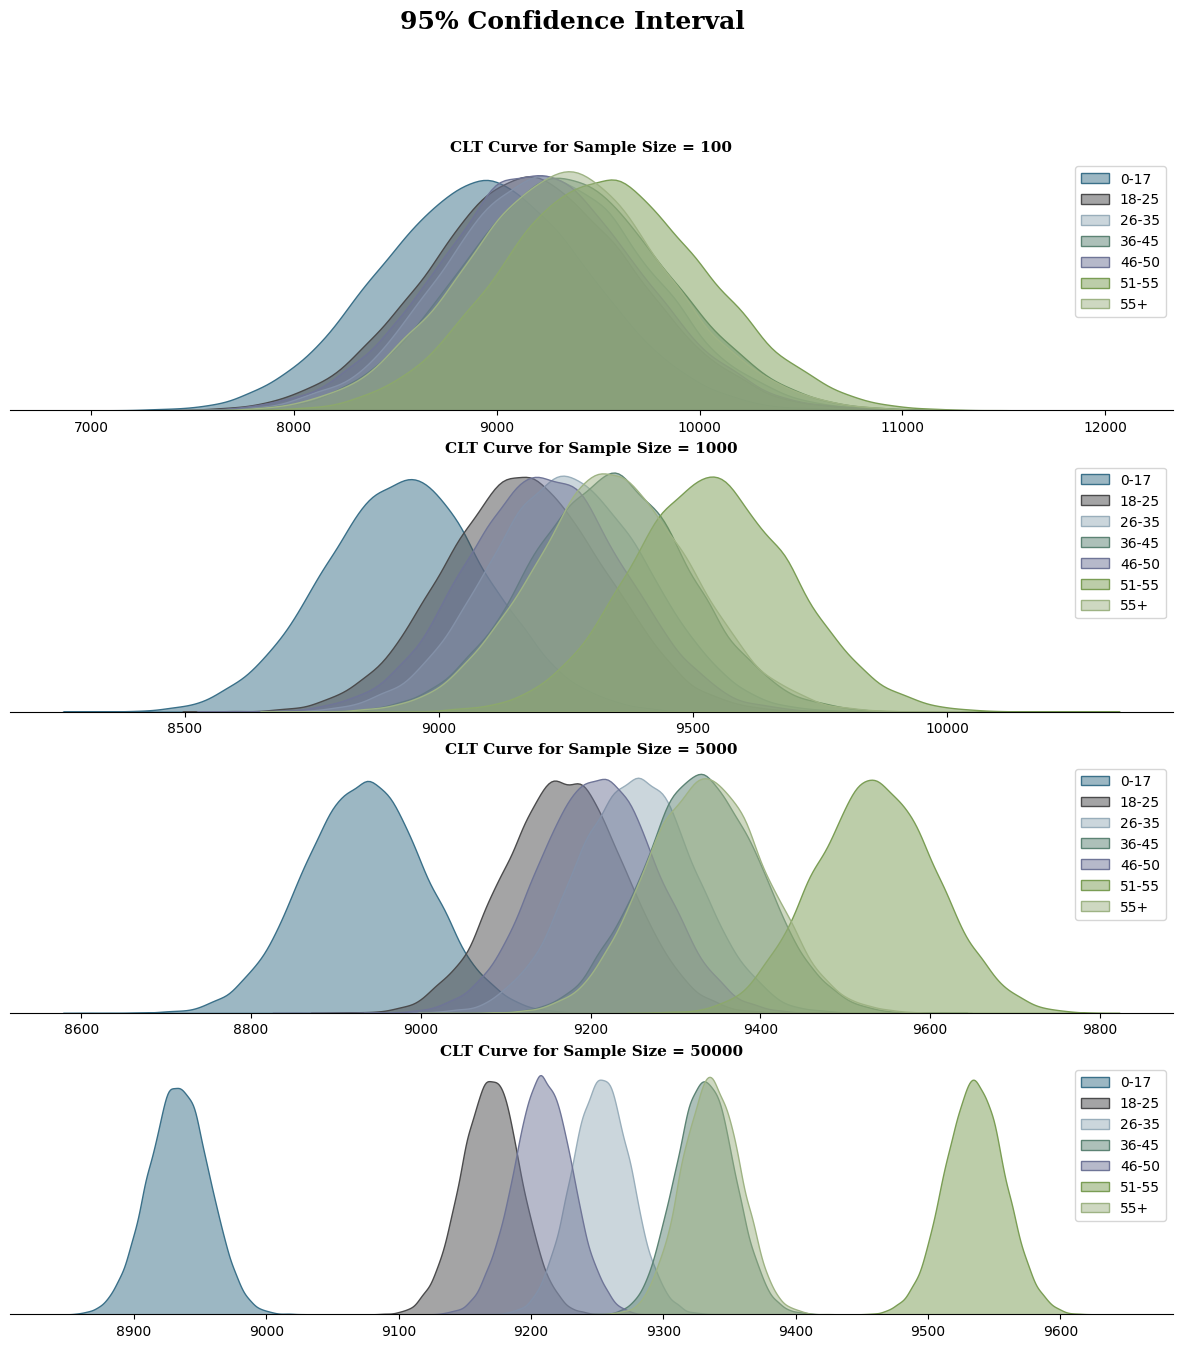

In [ ]:
samples1,samples2,samples3,samples4,samples5,samples6,samples7 = plot(95)

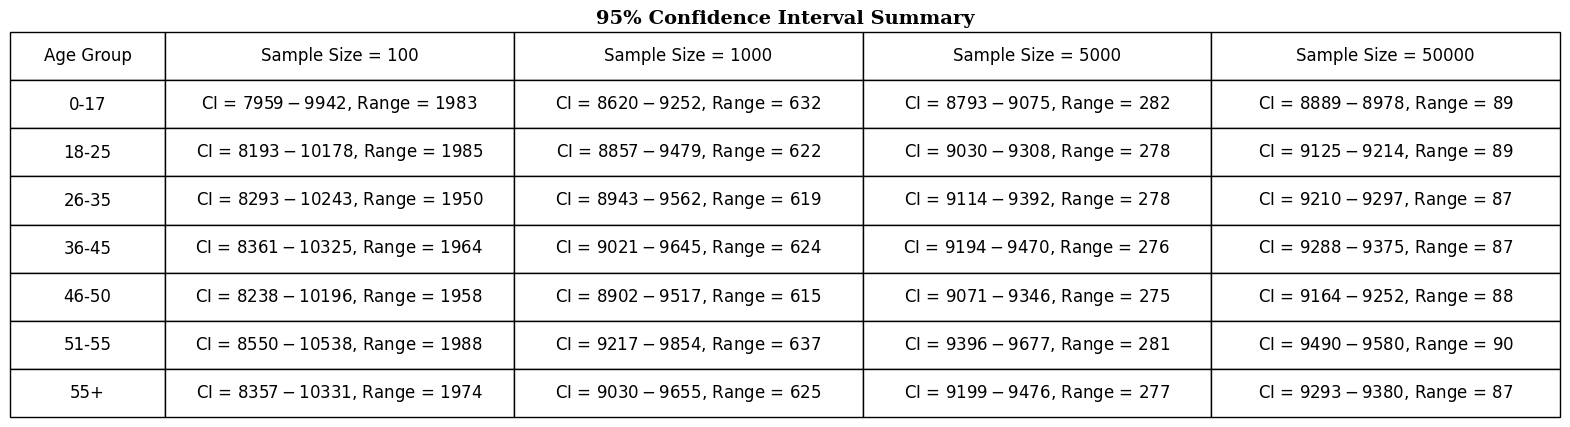

In [ ]:
# Are confidence intervals of customer's age-group spending overlapping?

fig,ax = plt.subplots(figsize = (20,5))

#list for collecting ci for given cl
ci_1,ci_2,ci_3,ci_4,ci_5,ci_6,ci_7 = ['0-17'],['18-25'],['26-35'],['36-45'],['46-50'],['51-55'],['55+']

#finding ci for each sample size
#samples = [samples1,samples2,samples3,samples4,samples5,samples6,samples7]

samples = [(samples1,ci_1),(samples2,ci_2),(samples3,ci_3),(samples4,ci_4),(samples5,ci_5),(samples6,ci_6),(samples7,ci_7)]

for s,c in samples:
    for i in s:
        s_range = confidence_interval(s[i],95)
        c.append(f"CI = ${s_range[0]:.0f} - ${s_range[1]:.0f}, Range = {(s_range[1] - s_range[0]):.0f}")


                                    #plotting the summary
#contents of the table
ci_info = [ci_1,ci_2,ci_3,ci_4,ci_5,ci_6,ci_7]

#plotting the table
table = ax.table(cellText = ci_info, cellLoc='center',
             colLabels =['Age Group','Sample Size = 100','Sample Size = 1000','Sample Size = 5000','Sample Size = 50000'],
             colLoc = 'center',colWidths = [0.1,0.225,0.225,0.225,0.225],bbox =[0, 0, 1, 1])

table.set_fontsize(13)

#removing axis
ax.axis('off')

#setting title
ax.set_title(f"95% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})

plt.show()

* The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence intervals become narrower and more precise. In business, this implies that larger sample sizes can provide more reliable insights and estimates.


* From the above analysis, we can see that the confidence interval overlap for some of the age groups. We can club the average spending into following age groups -
0 - 17 - Customers in this age group have the lowest spending per transaction
18 - 25, 26 - 35, 46 - 50 - Customers in these age groups have overlapping confidence intervals indicating similar buying characteristics
36 - 45, 55+ - Customers in these age groups have overlapping confidence intervals indicating and similar spending patterns
51 - 55 - Customers in this age group have the highest spending per transaction


* We are 95% confident that the true population average for following age groups falls between the below range -

        0 - 17 = $ 8,888 to 8,979
        18 - 25 = $ 9,125 to 9,213
        26 - 35 = $ 9,209 to 9,297
        36 - 45 = $ 9,288 to 9,376
        46 - 50 = $ 9,165 to 9,253
        51 - 55 = $ 9,490 to 9,579
        55+ = $ 9,292 to 9,381

**Recommendations**


* Since male customers account for a significant portion of Black Friday sales and tend to spend more per transaction on average, Walmart should tailor its marketing strategies and product offerings to incentivize higher spending among male customers while ensuring competitive pricing

* With the age group between 26 and 45 contributing to the majority of sales, Walmart should specifically cater to the preferences and needs of this demographic.This could include offering exclusive deals on products that are popular among this age group.


* Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them more attractive discounts, coupons, or rewards programs. It's essential to start building brand loyalty among younger consumers.

* Since customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, and so do the customers in 36 - 45 and 55+, Walmart can optimize its product selection to cater to the preferences of these age groups. Also, Walmart can use this information to adjust their pricing strategies for different age groups.


* Considering that customers aged 51 - 55 have the highest spending per transaction, Walmart offer them exclusive pre-sale access, special discount or provide personalized product recommendations for this age group. Walmart can also introduce loyalty programs specifically designed to reward and retain customers in the 51 - 55 age group.


* After Black Friday, walmart should engage with customers who made purchases by sending follow-up emails or offers for related products. This can help increase customer retention and encourage repeat business throughout the holiday season and beyond.